# Project: Investigate No_show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


**Data Dictionary**

01 - **PatientId**: Identification of a patient

02 - **AppointmentID**:Identification of each appointment.

03 - **Gender**: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - **AppointmentDay**: The day someone called or registered the appointment, this is before appointment of course.

05 - **ScheduledDay**: The day of the actuall appointment, when they have to visit the doctor.

06 - **Age**: How old is the patient.

07 - **Neighbourhood**: Where the appointment takes place.

08 - **Scholarship**: True of False.indicates whether or not the patient is enrolled in Brasilian welfare program https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - **Hipertension**: True or False.

10 - **Diabetes**: True or False.

11 - **Alcoholism**: True or False.

12 - **Handcap**: True or False

13 - **SMS_received**: 1 or more messages sent to the patient.

14 - **No-show**: True or False.it says 'No' if the patient showed up to their appointment, and 'Yes' if they didn't show up.


#### Question(s) for Analysis

from these variables we can try to know What factors are important to predict if a patient will show up for their scheduled appointment by trying to answer the following questions:

* Does the period between the schedueled day and appointment day affect showing up?
* Which neighbourhoods have more proportion of showing up?
* At what age patients are most likely to show up?
* Does scholarship affect showing up of patients? 
* Does hypertension affect showing up of patients?
* Does alcoholism affect showing up of patients?
* Does Handicap affect showing up of patients?
* Does Diabetes affect showing up of patients?
* Do patients who receives SMS show up more ?

#### Analysis in this nootbook

In this nootbook I tried to answer the first 4 questions above 


In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.5MB/s eta 0:00:01   13% |████▏                           | 1.4MB 13.2MB/s eta 0:00:01    19% |██████▏                         | 2.0MB 29.5MB/s eta 0:00:01    37% |███████████▉                    | 3.9MB 27.7MB/s eta 0:00:01    66% |█████████████████████▍          | 7.0MB 11.4MB/s eta 0:00:01    72% |███████████████████████▍        | 7.6MB 11.0MB/s eta 0:00:01    79% |█████████████████████████▍      | 8.3MB 15.9MB/s eta 0:00:01    85% |███████████████████████████▎    | 8.9MB 14.9MB/s eta 0:00:01    90% |█████████████████████████████   | 9.5MB 9.1MB/s eta 0:00:01    97% |███████████████████████████████ | 10.1MB 23.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01  7% |██▎                             | 972kB 10.8MB/s eta 0:00:02    11% |███▋                            | 1.5MB 24.2MB/s eta 0:00:01    15% |█████                           | 2.1MB 14.5MB/s eta 0:00:01    20% |██████▌                   

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Gathering Data

In [3]:
# Load data  
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Print out a few lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assesing Data

In [5]:
df.shape

(110527, 14)

In [6]:
# Check columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# View some statistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Check the values in the Age column
df.Age.value_counts() ## there are Ages of 0 & -1 let's explore them to see how could we handle them 

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [9]:
df[df.Age == -1] # It is only one row, so we can drop it 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df[df.Age == 0].head() # It is so many rows with different features, so we can replace it with the mean value of the age column 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [11]:
# Check for duplicates
sum(df.duplicated()) ## there are no duplicates

0

In [12]:
# Check for missing values
df.isna().sum() ## there are no missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
# Number of Unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [14]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [15]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [17]:
# Drop columns that we don't need in our analysis
df.drop(columns=['AppointmentID'],inplace = True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# Drop row Age = -1 
df = df[df['Age']>-1]
# Check
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [19]:
# Replace rows where age = 0 with the mean 
df.replace({'Age': {0: df.Age.mean()}},inplace = True) 
# Check
df.Age.value_counts()

37.089219     3539
1.000000      2273
52.000000     1746
49.000000     1652
53.000000     1651
              ... 
98.000000        6
115.000000       5
100.000000       4
102.000000       2
99.000000        1
Name: Age, Length: 103, dtype: int64

In [20]:
# Check for the datatype of Age column
df.Age.dtypes

dtype('float64')

In [21]:
# Change the datatype from float to int
df['Age'] = df['Age'].astype(int)
df.Age.dtypes

dtype('int64')

In [22]:
# Clean Handcap column by assuming that from 2 to 4 is also true and replace them with 1
df.replace({'Handcap': {2: 1, 3: 1, 4: 1}},inplace = True) 
df.Handcap.unique()

array([0, 1])

In [23]:
# rename Columns
df.rename(inplace = True , columns = {'No-show':'No_show'})
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [24]:
# Extract only the date part to compare between them
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# Add period column to use it in the analysis 
df['period']=df['AppointmentDay']-df['ScheduledDay']
df['period'].tail()

110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: period, dtype: timedelta64[ns]

In [26]:
# Drop date columns as we don't need them any more
df.drop(columns=['AppointmentDay','ScheduledDay'],inplace=True)
df.head(1)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,period
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days


In [27]:
# Extract the number of days only
df['period']=df['period'].astype(str)
df['period']=df['period'].str.extract('(\d+)').astype(int)

In [28]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,period
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis


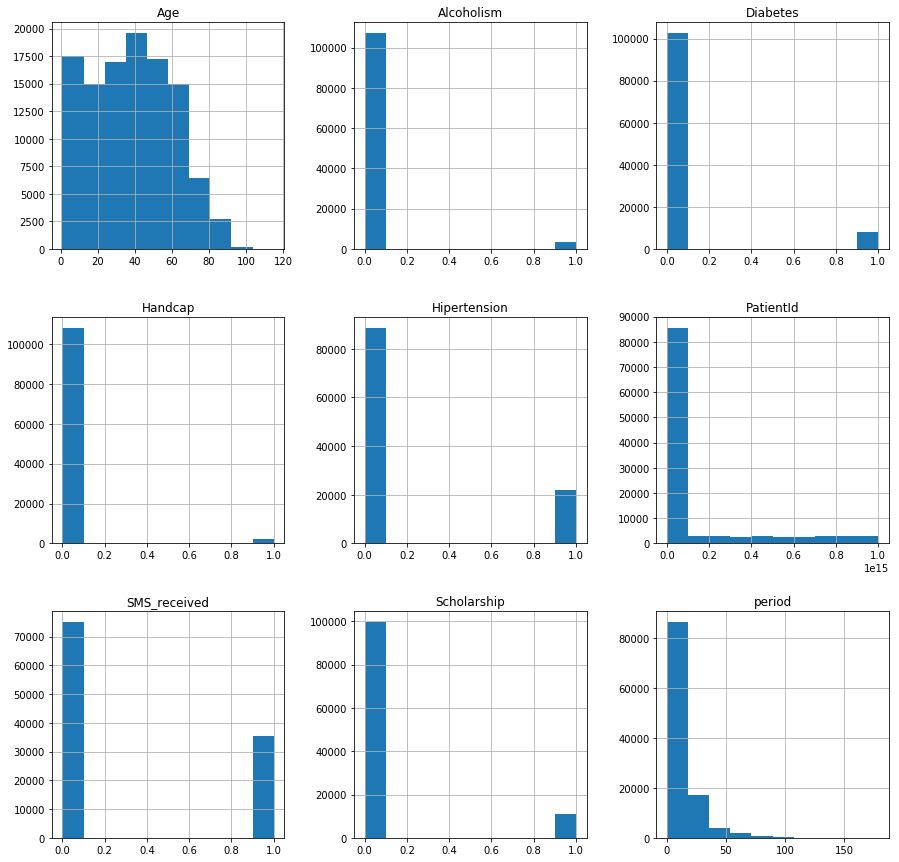

In [29]:
# Show the distribution of all columns
df.hist(figsize= (15,15));

In [30]:
# Making masks to make it easier to use
attended = df.No_show == 'No'
missed = df.No_show == 'Yes'

## Does the period between the schedueled day and appointment day affect showing up ?

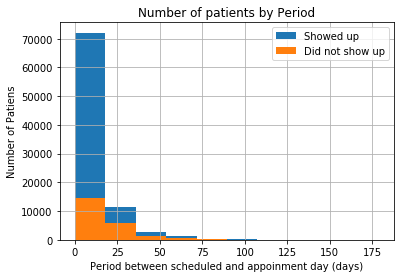

In [31]:
df.period[attended].hist(label='Showed up')
df.period[missed].hist(label='Did not show up')
plt.title('Number of patients by Period')
plt.xlabel('Period between scheduled and appoinment day (days)')
plt.ylabel('Number of Patiens')
plt.legend();

In [32]:
print(df.period[attended].mean())
print(df.period[missed].mean())

8.754758692620767
15.832384963484028


In [33]:
df.period.describe()

count    110526.000000
mean         10.183975
std          15.254914
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: period, dtype: float64

**As we see that the more number of days between the scheduled & appointment the less chance of showing up**


## Which neighbourhoods have more proportion of showing up of patients?

In [34]:
# Count number of attended patient in each Neighbourhood 
attended_by_Neighbourhood = df.Neighbourhood[attended].value_counts()

In [35]:
# Count number of missed patient in each Neighbourhood 
missed_by_Neighbourhood = df.Neighbourhood[missed].value_counts()

In [36]:
# Calculate the proportion of attended patient to those who didn't in each Neighbourhood
proportion_for_each_Neighbourhood =attended_by_Neighbourhood/missed_by_Neighbourhood
proportion_for_each_Neighbourhood

AEROPORTO              7.000000
ANDORINHAS             3.341651
ANTÔNIO HONÓRIO        4.420000
ARIOVALDO FAVALESSA    3.548387
BARRO VERMELHO         3.648352
                         ...   
SÃO JOSÉ               3.619159
SÃO PEDRO              3.753398
TABUAZEIRO             4.465969
UNIVERSITÁRIO          3.750000
VILA RUBIM             5.035461
Name: Neighbourhood, Length: 81, dtype: float64

In [37]:
# find the most commited neighbourhoods
most_committed_neighbourhoods=proportion_for_each_Neighbourhood[proportion_for_each_Neighbourhood > proportion_for_each_Neighbourhood.mean()]
most_committed_neighbourhoods.index

Index(['AEROPORTO', 'ANTÔNIO HONÓRIO', 'BOA VISTA', 'COMDUSA', 'CONQUISTA',
       'CONSOLAÇÃO', 'DE LOURDES', 'DO CABRAL', 'DO QUADRO', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'INHANGUETÁ',
       'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MATA DA PRAIA', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE',
       'NOVA PALESTINA', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'REDENÇÃO',
       'REPÚBLICA', 'SANTA LUÍZA', 'SANTA MARTHA', 'SANTO ANTÔNIO',
       'SOLON BORGES', 'TABUAZEIRO', 'VILA RUBIM'],
      dtype='object')

In [38]:
# Find the most neighbourhood that have max proportion of attended patients
proportion_for_each_Neighbourhood.idxmax()

'ILHA DO BOI'

**As we see the proportion differ from one neighbourhood to another so may be it affect it**

## At what age patients are most likely to show up ?

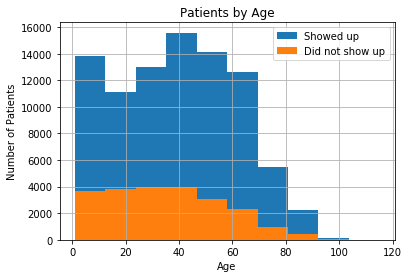

In [39]:
df.Age[attended].hist(label = 'Showed up')
df.Age[missed].hist(label = 'Did not show up')
plt.title('Patients by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend();

In [40]:
print('Age average that show up in the appointment = {} year'.format(int(df.Age[attended].mean())))
print('Age average that does not show up in the appointment = {} year'.format(int(df.Age[missed].mean())))

Age average that show up in the appointment = 39 year
Age average that does not show up in the appointment = 35 year


**most committed patients are of age 37 & as we see the older patients are more commited**

## What gender of patient most likely to show up ?

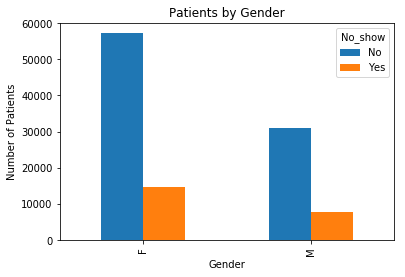

In [41]:
df.groupby(['Gender','No_show']).PatientId.count().unstack().plot(kind = 'bar')
plt.title('Patients by Gender')
plt.ylabel('Number of Patients');

In [42]:
gender =df.groupby(['Gender','No_show']).PatientId.count()
gender

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: PatientId, dtype: int64

In [43]:
attended_females_percent=(gender[0]/(gender[0]+gender[1]))*100
attended_females_percent

79.68512924734476

In [44]:
attended_males_percent=(gender[2]/(gender[2]+gender[3]))*100
attended_males_percent

80.03205211052808

**As we see there are more females than males in the dataset but if we take a look at the proportion of showing up in the 2 genders we will find out that they are mostly the same with a little different**

## Does the scholarship affect showing up of patients?

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: PatientId, dtype: int64

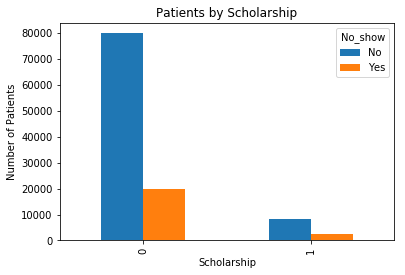

In [45]:
df.groupby(['Scholarship','No_show']).PatientId.count().unstack().plot(kind = 'bar')
plt.title('Patients by Scholarship')
plt.ylabel('Number of Patients');
df.groupby(['Scholarship','No_show']).PatientId.count()

**As we see there are a little different in the porportion of each calss of them the percent of showing up in non scholarship class is around 80% and the patients with scholarship is around 76% so we say that it may affects & the patients with no scholarship are more likely to show up**

## Some charcteristic of the dataset 

In [46]:
# Creat function to plot pie chart by taking the column & the title as inputs
def pie_plot(column, title):
    df[column].value_counts().plot(figsize=(5,5),kind='pie',autopct='%.2f');
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()

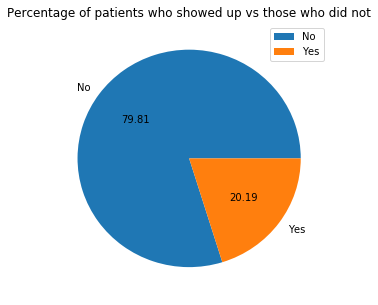

In [47]:
pie_plot(column='No_show',title='Percentage of patients who showed up vs those who did not') 

**79.81% Showed up in their appointments**

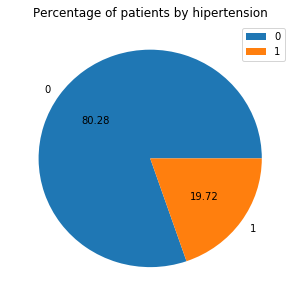

In [48]:
pie_plot(column='Hipertension',title='Percentage of patients by hipertension')

**80% doesn't have hibertension**

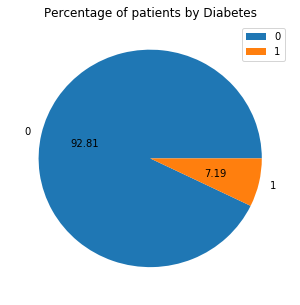

In [49]:
pie_plot(column='Diabetes',title='Percentage of patients by Diabetes')

**92.81% doesn't have diabetes**

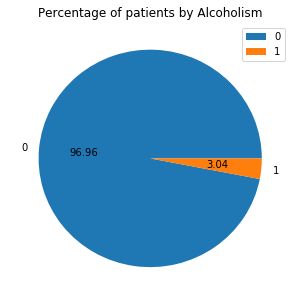

In [50]:
pie_plot(column='Alcoholism',title='Percentage of patients by Alcoholism')

**96.96% doesn't have Alcoholism**

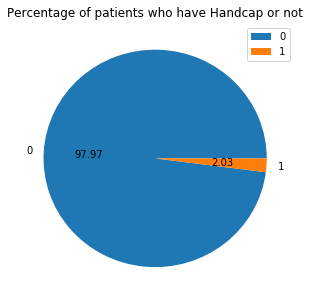

In [51]:
pie_plot(column='Handcap',title='Percentage of patients who have Handcap or not')

**97.97% doesn't have handicap**

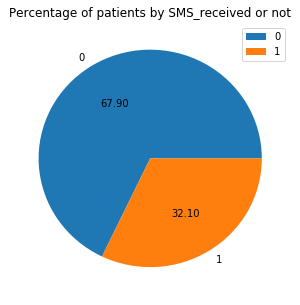

In [52]:
pie_plot(column='SMS_received',title='Percentage of patients by SMS_received or not')

**67.9% didn't recieve SMS**

<a id='conclusions'></a>
## Conclusions

**Results:**

1- The more number of days between the scheduled & appointment the less chance of showing up

2- most committed patients are of age 37 & as we see the older patients are more commited

3- the proportion differ from one neighbourhood to another so may be it affect it 
  * the most showing up percent in the ILHA DO BOI neighbourhood
  
4- It's hard to say that gender have effect on showing up or not.

5- scholarship may affects & the patients with no scholarship are more likely to show up

**Some charcteristic of the dataset**

  * 79.81% Showed up in their appointments
  * 80% doesn't have hibertension
  * 92.81% doesn't have diabetes
  * 96.96% doesn't have Alcoholism
  * 97.97% doesn't have handicap
  * 67.9% didn't recieve SMS



### Limitations

**There are some nonreasonable data:**

1- Age have values like -1 and alot of 0s 

2- Hibertension have values like 2,3,4 

3- There are young ages who have alcoholism

## Submitting your Project 

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0